### Student Information
Name: 馬瑞麟

Student ID: 110072238

GitHub ID: 110072238raylinma

### Instructions



1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [1]:
from sklearn.datasets import fetch_20newsgroups

categories = ["alt.atheism", "soc.religion.christian", "comp.graphics", "sci.med"]
twenty_train = fetch_20newsgroups(
    subset="train", categories=categories, shuffle=True, random_state=42
)
import pandas as pd
import helpers.data_mining_helpers as dmh
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

Answer:  
I Sample 5 records from every 2nd record of the first 1000 "soc.religion.christian" records.  
Only shows the "text" and "category label", sorting records by their index.

In [2]:
X[X["category_name"]=="soc.religion.christian"].iloc[:1000:2,0:3:2].sample(5).sort_index()

,text,category_name
93,From: jodfishe@silver.ucs.indiana.edu (joseph ...,soc.religion.christian
815,From: kilroy@gboro.rowan.edu (Dr Nancy's Sweet...,soc.religion.christian
836,From: mdw33310@uxa.cso.uiuc.edu (Michael D. Wa...,soc.religion.christian
1417,From: jayne@mmalt.guild.org (Jayne Kulikauskas...,soc.religion.christian
2206,From: jsledd@ssdc.sas.upenn.edu (James Sledd) ...,soc.religion.christian


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Answer:  
When we use NA_df['missing_example'].isnull(), we want to find the data whose 'missing_example' is undefined or None...<br>
Check the dict VS. "is.null() table" and explain it one by one.<br>
 
* NA_dict = [{ 'id': 'A', 'missing_example': np.nan },=> True<br>
* { 'id': 'B'                    },                   => True<br>
* { 'id': 'C', 'missing_example': 'NaN'  },=> False<br>
* { 'id': 'D', 'missing_example': 'None' },=> False<br>
* { 'id': 'E', 'missing_example':  None  },=> True<br>
* { 'id': 'F', 'missing_example': ''     }]=> False<br>
           
For A, np.nan means that the column is empty or unable to read, which can be regarded as undefined. The result be True is correct.<br>
For B, it doesn't have 'missing_example' value, so result be True is correct.<br>
For C, the value is a string called 'NaN'. As it exists and not be undefined, so the result is False.<br>
For D, similarly, the value is a string called 'None'. As it exists and not be undefined, so the result is False.<br>
For E, the value is actually None, so result be True is correct.<br>
For F, the value is a string called "", As it exists and not be undefined, so the result is False.<br>

To conclude, once the value of column is a string, it will not be caught in "is.null() function."

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [3]:
X_sample = X.sample(n=2000)
print(X.category_name.value_counts())
print(X_sample.category_name.value_counts())

category_name
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: count, dtype: int64
category_name
soc.religion.christian    535
sci.med                   529
comp.graphics             515
alt.atheism               421
Name: count, dtype: int64


* The index, that is the column before text of X is always orderd. However, the index of X_sample is not orderd unless we use
the sort_index() function.<br>
* The ratio of the categories of X is fixed, but that of the X_bar is not fixed due to sampling. Therefore, the ratio of categories of X and X_sample is not the same.

category_name  
soc.religion.christian    599  
sci.med                   594  
comp.graphics             584  
alt.atheism               480  
Name: count, dtype: int64  

category_name  
sci.med                   varies  
comp.graphics             varies   
soc.religion.christian    varies   
alt.atheism               varies    
Name: count, dtype: int64  

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

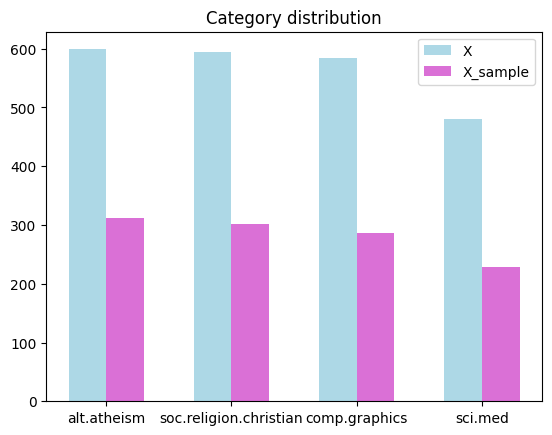

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
y1 = X.category_name.value_counts()
n =sum(y1)//2
X_sample = X.sample(n=n)
y2 = X_sample.category_name.value_counts()
bar_width = 0.3
x = np.arange(4)
plt.title('Category distribution') 
plt.bar(x,y1,bar_width,color='lightblue',label='X')
plt.bar(x+bar_width,y2,bar_width,color='orchid',label='X_sample')
plt.xticks(x+bar_width/2,categories)
plt.legend()

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()
print(count_vect.get_feature_names_out()[1:2])

['000']


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

,term_the,term_of,term_to,term_and,term_is,term_in,term_that,term_it,term_you,term_for,term_not,term_this,term_be,term_from,term_are,term_edu,term_have,term_as,term_on,term_with
doc_0,5,1,4,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
doc_1,11,8,4,0,10,2,0,2,0,2,0,3,4,1,0,1,2,1,0,0
doc_2,14,10,26,9,4,6,8,8,13,6,8,14,8,2,6,2,1,0,1,7
doc_3,6,2,0,1,1,3,0,0,0,1,0,1,0,1,0,0,0,0,2,0
doc_4,10,3,8,3,2,3,1,1,1,2,0,2,0,1,2,2,0,2,1,0
doc_5,12,6,14,7,7,4,10,1,0,0,4,2,12,1,3,2,2,3,1,0
doc_6,3,7,8,7,4,4,2,3,0,5,4,0,3,2,5,2,1,4,3,2
doc_7,21,11,11,9,9,3,11,10,0,1,4,2,5,4,3,0,4,4,8,5
doc_8,6,4,6,5,5,3,2,2,1,0,0,1,0,1,3,6,0,0,0,0
doc_9,10,6,21,23,1,4,18,2,5,3,5,7,1,1,0,2,7,3,6,9


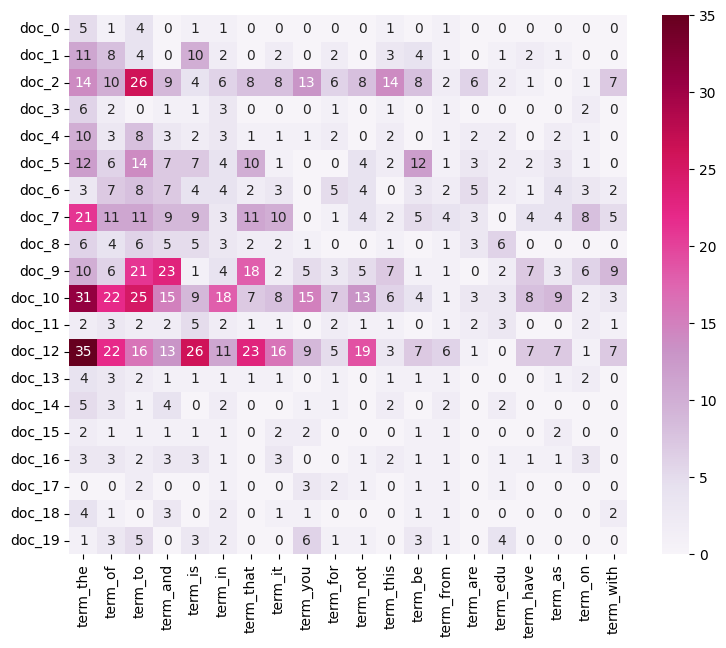

In [6]:
# I sum up the frequency of each word, and sort them to get the top 20 most-used word.
# Then I display first 20 text with it to present the hotmap.

from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

analyze = count_vect.build_analyzer()
analyze("".join(X[:1].text[0]))
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) 
sum_words = X_counts.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vect.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)



plot_x = ["term_"+str(i[0]) for i in words_freq][:20]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

def count_the_most(analyze,words_freq):
    word_count = []
    for target in words_freq:
        c = 0
        for every_word in analyze:
            if every_word == target[0]:
                c +=1
        word_count.append(c)
    return word_count
plot_z = [count_the_most(analyze("".join(X.text[i])),words_freq=words_freq[:20]) for i in range(20)]


df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                cmap="PuRd",
                vmin=0, vmax=max(max(plot_z)), annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

Text(0.5, 0, '\nZ Label')

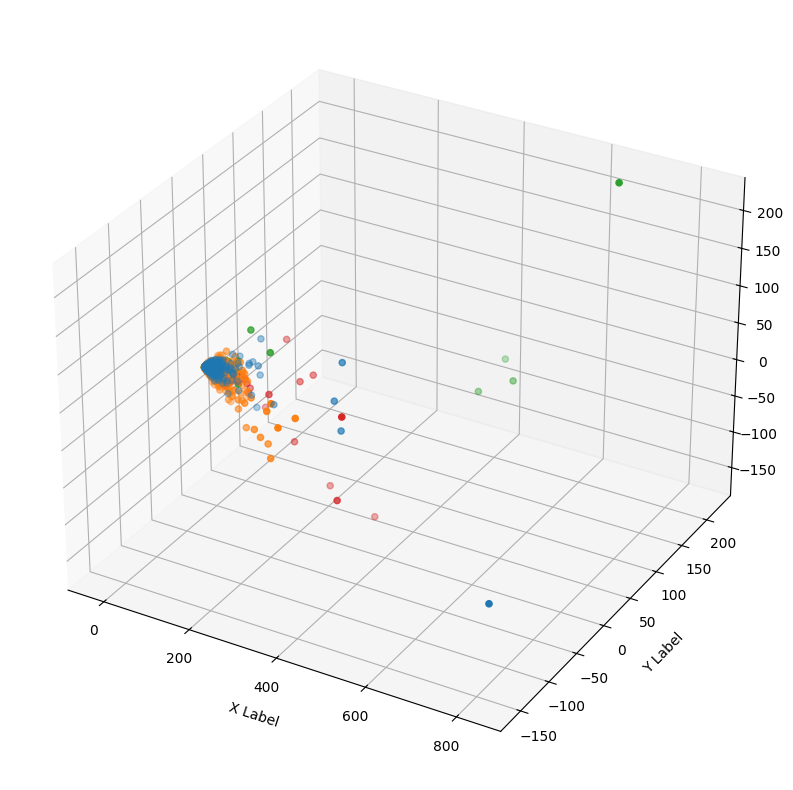

In [7]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'orange']
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

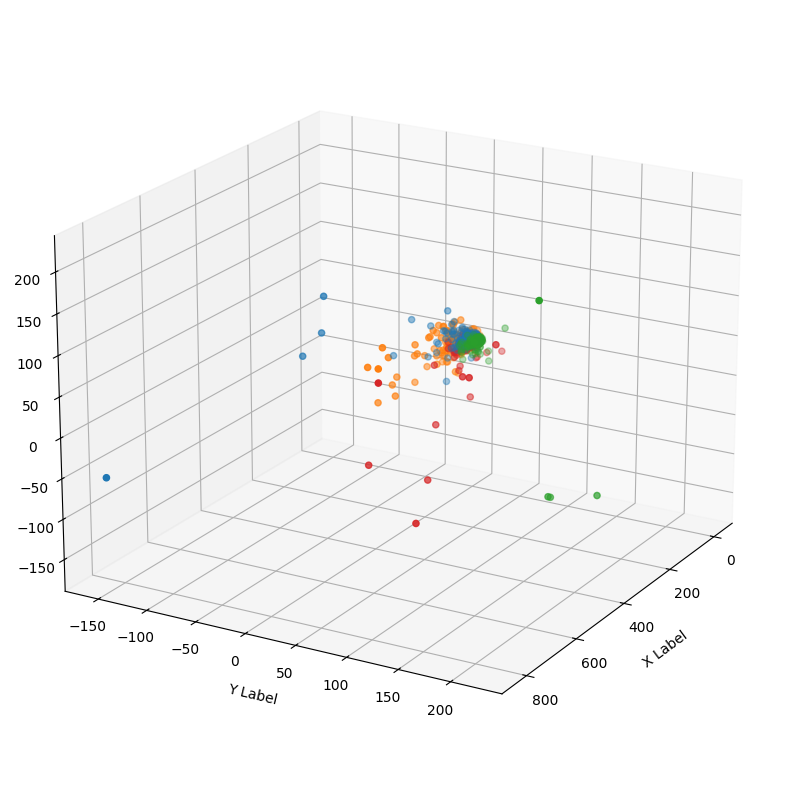

In [8]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'orange']
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(azim=30, elev=20)
plt.show()

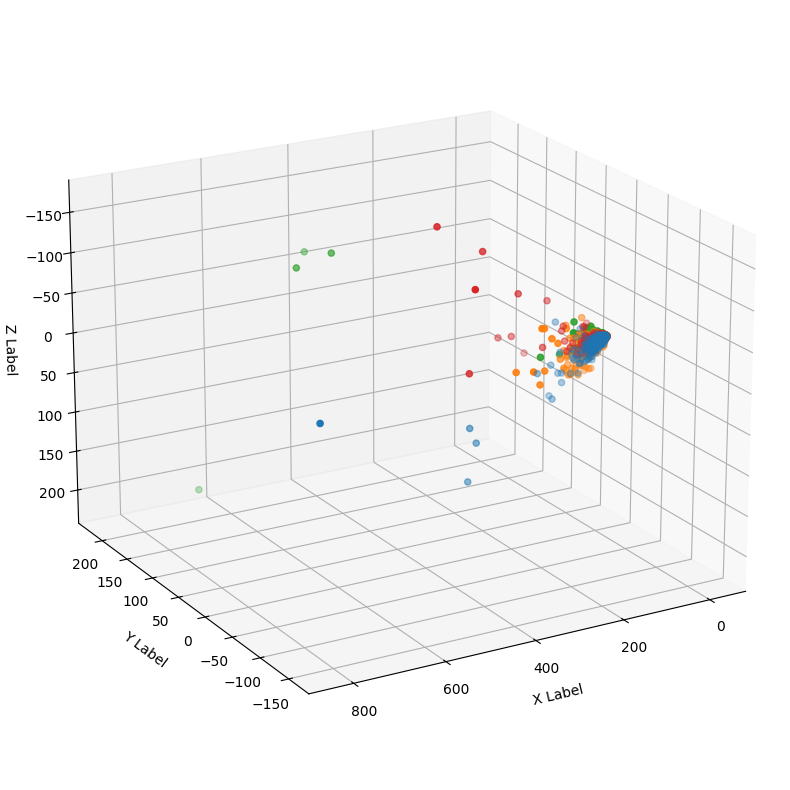

In [9]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'orange']
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(azim=120, elev=200)
plt.show()

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [10]:
import plotly.express as px
sum_words = X_counts.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for idx,word in enumerate(count_vect.get_feature_names_out())]
fig = px.bar(x=[i[0] for i in words_freq][:300],y=[i[1] for i in words_freq][:300],title='Words frequency',
            labels={'word':'frequency'})
fig.update_xaxes(title_text='Word')
fig.update_yaxes(title_text='Frequency')
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [11]:
import plotly.express as px
sum_words = X_counts.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for idx,word in enumerate(count_vect.get_feature_names_out())]
# It's a less time-consuming function, we could use it directly to largely decrease the computing time.

# Or if we only want to see the relative frequency of each word, we could only sample 300 text for example.
# However, we might miss some word, but we can observe the most-used word relative frequency.
X_sample = X.sample(n = 300)
X_sample_counts = count_vect.fit_transform(X_sample.text)
sum_words_sample = X_sample_counts.sum(axis=0)
words_freq = [(word, sum_words_sample[0, idx]) for idx,word in enumerate(count_vect.get_feature_names_out())]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

fig = px.bar(x=[i[0] for i in words_freq][:300],y=[i[1] for i in words_freq][:300],title='Words frequency',)
fig.update_layout(title='Words frequency', xaxis_title='word', yaxis_title='frequency')
fig.show()

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [12]:
import plotly.express as px
sum_words = X_counts.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for idx,word in enumerate(count_vect.get_feature_names_out())]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
# I sort the words_freq orders by frequency of word. 

fig = px.histogram(x=[i[0] for i in words_freq][:500],y=[i[1] for i in words_freq][:500],nbins=200,opacity=0.8)
fig.update_traces(marker=dict(color='lightblue'))

fig.update_layout(title='Words frequency', xaxis_title='word', yaxis_title='frequency')
fig.show()


### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [13]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

'''No, as it shows, they are all [0,0,0,0]. After searching for documentation about it, 
it says the label should be continuos instead of categorical! '''

'No, as it shows, they are all [0,0,0,0]. After searching for documentation about it, \nit says the label should be continuos instead of categorical! '

## Part 2
First, combined the data into one dataset, split the text and the score, adding their source, source_name for further study.

In [14]:
fh1 = open('yelp_labelled.txt','r')
fh2 = open('imdb_labelled.txt','r')
fh3 = open('amazon_cells_labelled.txt','r')
data = []
for line in fh1.readlines():
    data.append(line[:-1].split("\t")+[0,'yelp'])
for line in fh2.readlines():
    data.append(line[:-1].split("\t")+[1,'imdb'])
for line in fh3.readlines():
    data.append(line[:-1].split("\t")+[2,'amazon_cells'])
    
fh1.close()
fh2.close()
fh3.close()

Exerciese 1: Print out the text data for the first three data in the dataset.

In [15]:
for line in data[:3]:
    print(line[0])

Wow... Loved this place.
Crust is not good.
Not tasty and the texture was just nasty.


Transform data to pandas object and rename the columns.

In [16]:
import pandas as pd
X = pd.DataFrame(data)
X = X.rename(columns={0:'text',1:"score",2:'source',3:'source_name'})
X

,text,score,source,source_name
0,Wow... Loved this place.,1,0,yelp
1,Crust is not good.,0,0,yelp
2,Not tasty and the texture was just nasty.,0,0,yelp
3,Stopped by during the late May bank holiday of...,1,0,yelp
4,The selection on the menu was great and so wer...,1,0,yelp
...,...,...,...,...
2995,The screen does get smudged easily because it ...,0,2,amazon_cells
2996,What a piece of junk.. I lose more calls on th...,0,2,amazon_cells
2997,Item Does Not Match Picture.,0,2,amazon_cells
2998,The only thing that disappoint me is the infra...,0,2,amazon_cells


Simple query the data.

In [17]:
X[:10][['text','score']]

,text,score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


Use iloc to query the text of the top 10 data.

In [18]:
X.iloc[:10,0]

0                             Wow... Loved this place.
1                                   Crust is not good.
2            Not tasty and the texture was just nasty.
3    Stopped by during the late May bank holiday of...
4    The selection on the menu was great and so wer...
5       Now I am getting angry and I want my damn pho.
6                Honeslty it didn't taste THAT fresh.)
7    The potatoes were like rubber and you could te...
8                            The fries were great too.
9                                       A great touch.
Name: text, dtype: object

Use loc to query the score of the top 10 data.

In [19]:
X.loc[:10,'score']

0     1
1     0
2     0
3     1
4     1
5     0
6     0
7     0
8     1
9     1
10    1
Name: score, dtype: object

Exercise 3: Try to fetch records belonging to the yelp category, and query every 10th record. Only show the first 5 records.

In [20]:
X[X['source_name']=='yelp'][::10][:5]

,text,score,source,source_name
0,Wow... Loved this place.,1,0,yelp
10,Service was very prompt.,1,0,yelp
20,The Burrittos Blah!,0,0,yelp
30,"Also there are combos like a burger, fries, an...",1,0,yelp
40,The shrimp tender and moist.,1,0,yelp


Check the missing values.

In [21]:
X.isnull()

,text,score,source,source_name
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2995,False,False,False,False
2996,False,False,False,False
2997,False,False,False,False
2998,False,False,False,False


Check the missing values for columns.

In [22]:
import helpers.data_mining_helpers as dmh
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,source,source_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


Exercise 4
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.<br>
=> Check the missing values for rows

In [23]:
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

Create a dummy record and transform its type.

In [24]:
dummy_series = pd.Series(["dummy_record", 0], index=["text", "source"])
dummy_series
dummy_series.to_frame().T

,text,source
0,dummy_record,0


Create an new dataset added the dummy record.

In [25]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)
result_with_series

,text,score,source,source_name
0,Wow... Loved this place.,1,0,yelp
1,Crust is not good.,0,0,yelp
2,Not tasty and the texture was just nasty.,0,0,yelp
3,Stopped by during the late May bank holiday of...,1,0,yelp
4,The selection on the menu was great and so wer...,1,0,yelp
...,...,...,...,...
2996,What a piece of junk.. I lose more calls on th...,0,2,amazon_cells
2997,Item Does Not Match Picture.,0,2,amazon_cells
2998,The only thing that disappoint me is the infra...,0,2,amazon_cells
2999,"You can not answer calls with the unit, never ...",0,2,amazon_cells


Check the missing value again.

In [26]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,source,source_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,1,0,1


Create an dummy record in a dictionary form, adding it into our oringinal dataset.

In [27]:
dummy_dict = [{'text': 'dummy_record',
                'source': 0
            }]
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)
X

,text,score,source,source_name
0,Wow... Loved this place.,1,0,yelp
1,Crust is not good.,0,0,yelp
2,Not tasty and the texture was just nasty.,0,0,yelp
3,Stopped by during the late May bank holiday of...,1,0,yelp
4,The selection on the menu was great and so wer...,1,0,yelp
...,...,...,...,...
2996,What a piece of junk.. I lose more calls on th...,0,2,amazon_cells
2997,Item Does Not Match Picture.,0,2,amazon_cells
2998,The only thing that disappoint me is the infra...,0,2,amazon_cells
2999,"You can not answer calls with the unit, never ...",0,2,amazon_cells


Drop the data with missing value and recheck it.

In [28]:
X.dropna(inplace=True)
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,source,source_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


To see how many data in dataset are duplicated.

In [29]:
X.duplicated()
sum(X.duplicated())

17

Drop the duplicated data, only keep the data appears in the first.

In [30]:
X.drop_duplicates(keep='first', inplace=True)
X

,text,score,source,source_name
0,Wow... Loved this place.,1,0,yelp
1,Crust is not good.,0,0,yelp
2,Not tasty and the texture was just nasty.,0,0,yelp
3,Stopped by during the late May bank holiday of...,1,0,yelp
4,The selection on the menu was great and so wer...,1,0,yelp
...,...,...,...,...
2995,The screen does get smudged easily because it ...,0,2,amazon_cells
2996,What a piece of junk.. I lose more calls on th...,0,2,amazon_cells
2997,Item Does Not Match Picture.,0,2,amazon_cells
2998,The only thing that disappoint me is the infra...,0,2,amazon_cells


In [31]:
X_sample = X.sample(n=1000)
display(X_sample)

,text,score,source,source_name
1082,If there was ever a movie that needed word-of-...,1,1,imdb
1872,The story starts too fast with absolutely no s...,0,1,imdb
669,Google mediocre and I imagine Smashburger will...,0,0,yelp
1595,"Easily, none other cartoon made me laugh in a ...",1,1,imdb
343,It's worth driving up from Tucson!,1,0,yelp
...,...,...,...,...
2321,I ordered this product first and was unhappy w...,0,2,amazon_cells
582,"If you look for authentic Thai food, go else w...",0,0,yelp
2531,They refuse to refund or replace.,0,2,amazon_cells
224,"It was either too cold, not enough flavor or j...",0,0,yelp


Exercise 6 (take home) To see the difference between X and X_sample

* The index, that is the column before text of X is always orderd. However, the index of X_sample is not orderd unless we use
the sort_index() function.<br>
* The ratio of the categories of X is fixed, but that of the X_bar is not fixed due to sampling. Therefore, the ratio of categories of X and X_sample is not the same.

In [32]:
X_sample = X.sample(n=1000)
print(X.source_name.value_counts())
print(X_sample.source_name.value_counts())

source_name
imdb            997
yelp            996
amazon_cells    990
Name: count, dtype: int64
source_name
yelp            354
imdb            327
amazon_cells    319
Name: count, dtype: int64


Draw the bar chart in terms of source distribute.

<Axes: title={'center': 'Source distribution'}, xlabel='source_name'>

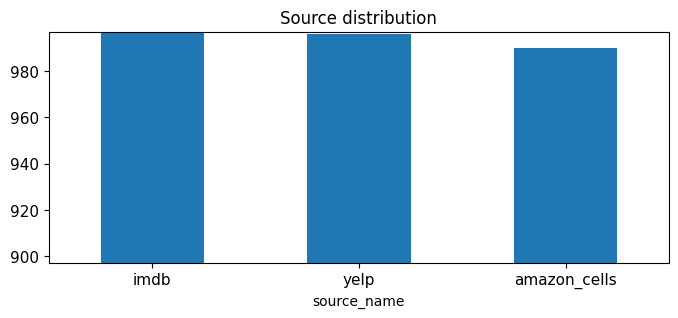

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

source =  ['yelp','imdb','amazon_cells']
upper_bound = max(X.source_name.value_counts())

X.source_name.value_counts().plot(kind = 'bar',
                                title = 'Source distribution',
                                ylim = [upper_bound*0.9, upper_bound],        
                                rot = 0, fontsize = 11, figsize = (8,3))

We found that it doesn't have lots of meaning to only focus on the source distribute, we would like to check the ratio of 1-score distribute.

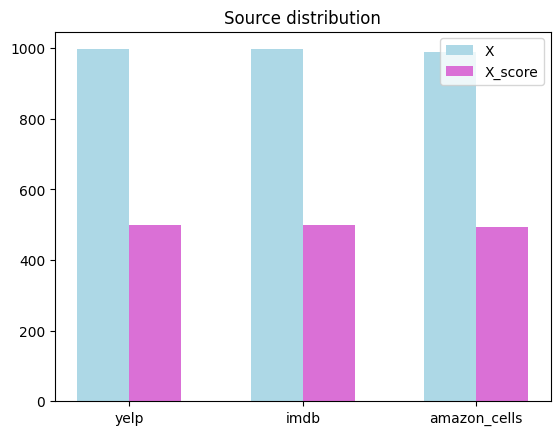

In [34]:
import numpy as np
y1 = X.source_name.value_counts()
n = sum(y1)//2
X_scored = X[X['score']=='1']
y2 = X_scored.source_name.value_counts()
bar_width = 0.3
x = np.arange(3)
plt.title('Source distribution') 
plt.bar(x,y1,bar_width,color='lightblue',label='X')
plt.bar(x+bar_width,y2,bar_width,color='orchid',label='X_score')
plt.xticks(x+bar_width/2,source)
plt.legend()

It's not the best way to show such information in side-by-side bar chart, so we could use a stacked bar chart instead.

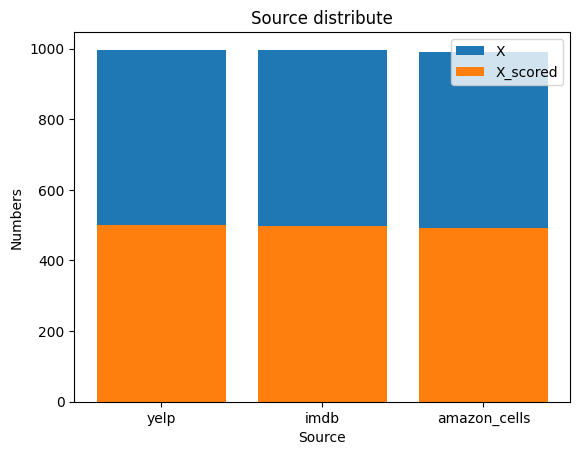

In [35]:
source =  ['yelp','imdb','amazon_cells']
Y = X_scored.source_name.value_counts()
upper_bound = max(X.source_name.value_counts())
plt.bar(source, X.source_name.value_counts(), label='X')
plt.bar(source, Y, label='X_scored')

plt.xlabel('Source')
plt.ylabel('Numbers')
plt.title('Source distribute')
plt.legend()

Okay... As the result, we could find that the data seems to be quite similar in this stage.

Now, we tokenize the text in each line, making it a column in dataset.

In [36]:
import nltk
nltk.download('punkt')
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
X[0:4]["unigrams"]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gf812\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0                    [Wow, ..., Loved, this, place, .]
1                            [Crust, is, not, good, .]
2    [Not, tasty, and, the, texture, was, just, nas...
3    [Stopped, by, during, the, late, May, bank, ho...
Name: unigrams, dtype: object

Learn the vocabulary and return document-term matrix.

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
print(X_counts.shape)
print(X_counts[0])
print(X[:1])

(2983, 5155)
  (0, 5112)	1
  (0, 2711)	1
  (0, 4558)	1
  (0, 3351)	1
                       text score  source source_name  \
0  Wow... Loved this place.     1       0        yelp   

                            unigrams  
0  [Wow, ..., Loved, this, place, .]  


Analyze it in order to find meaningful word.

In [38]:
analyze = count_vect.build_analyzer()
analyze(X.text[0])

['wow', 'loved', 'this', 'place']

To see the first ten word in dataset, it seems to not appear in X_counts[0:5, 0:20] because there's only 0 in the matrix.

In [39]:
print(X_counts[0:5, 0:20].toarray())
print(count_vect.get_feature_names_out()[0:10])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
['00' '10' '100' '11' '12' '13' '15' '15g' '15pm' '17']


Create a plot to show the most-appeared word frequency in the first 20 text.

,term_the,term_and,term_it,term_is,term_to,term_this,term_of,term_was,term_in,term_for,term_that,term_not,term_with,term_my,term_very,term_good,term_on,term_you,term_great,term_but
doc_0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
doc_2,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
doc_3,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_4,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
doc_5,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
doc_6,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
doc_7,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
doc_8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
doc_9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


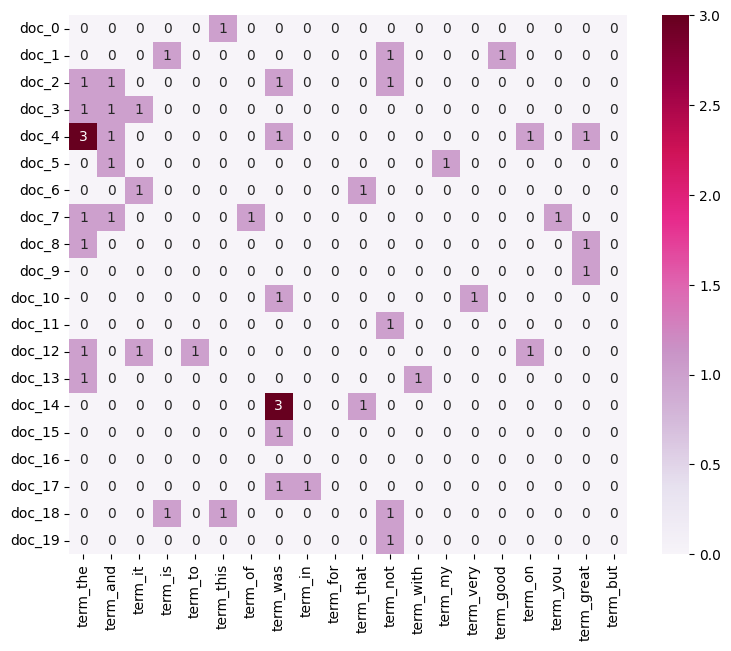

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

analyze = count_vect.build_analyzer()
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
sum_words = X_counts.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vect.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)



plot_x = ["term_"+str(i[0]) for i in words_freq][:20]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

# to count the frequency of the most-appeared word in text-anaylize
def count_from_the_most(analyze,words_freq):                 
    word_count = []
    for target in words_freq:
        c = 0
        for every_word in analyze:
            if every_word == target[0]:
                c +=1
        word_count.append(c)
    return word_count
plot_z = [count_from_the_most(analyze("".join(X.text[i])),words_freq=words_freq[:20]) for i in range(20)]


df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                cmap="PuRd",
                vmin=0, vmax=max(max(plot_z)), annot=True)

Reduce the dimension of dataset into 2.

In [41]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2983, 2)


Find the grouping by source from 2D visualization.

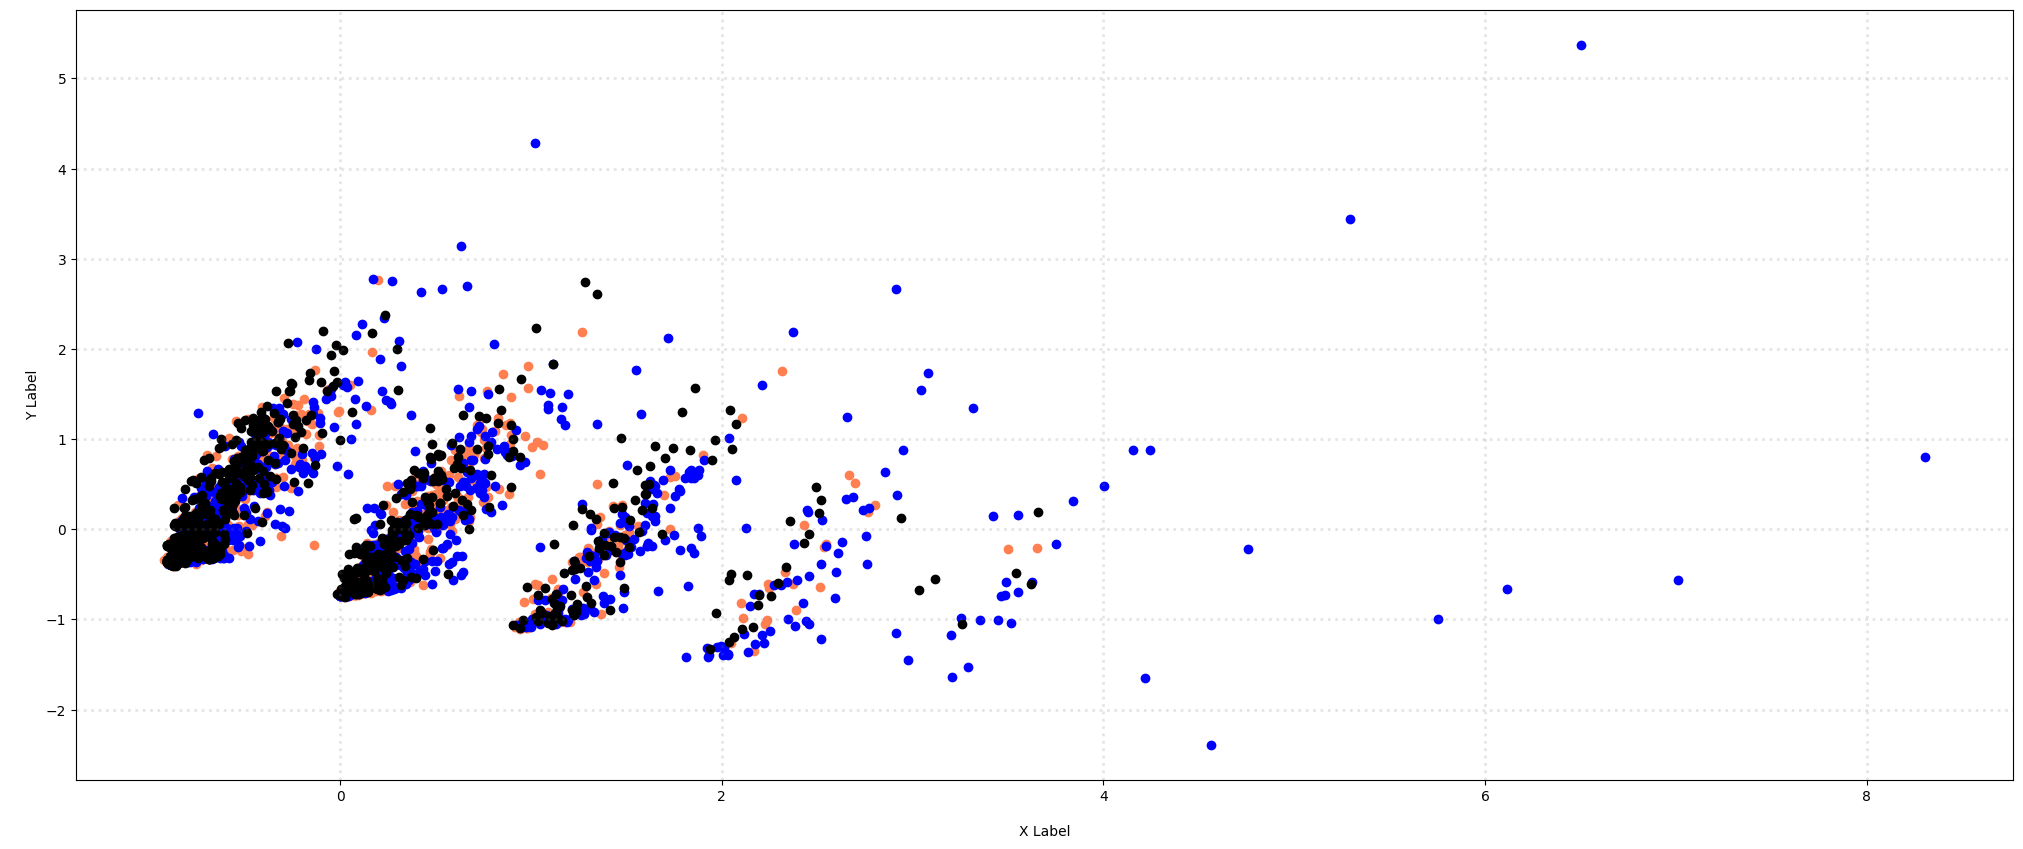

In [42]:
col = ['coral', 'blue', 'black']
source = ['yelp','imdb','amazon_cells']
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, source in zip(col, source):
    xs = X_reduced[X['source_name'] == source].T[0]
    ys = X_reduced[X['source_name'] == source].T[1]
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

Find the grouping by score from 2D visualization.

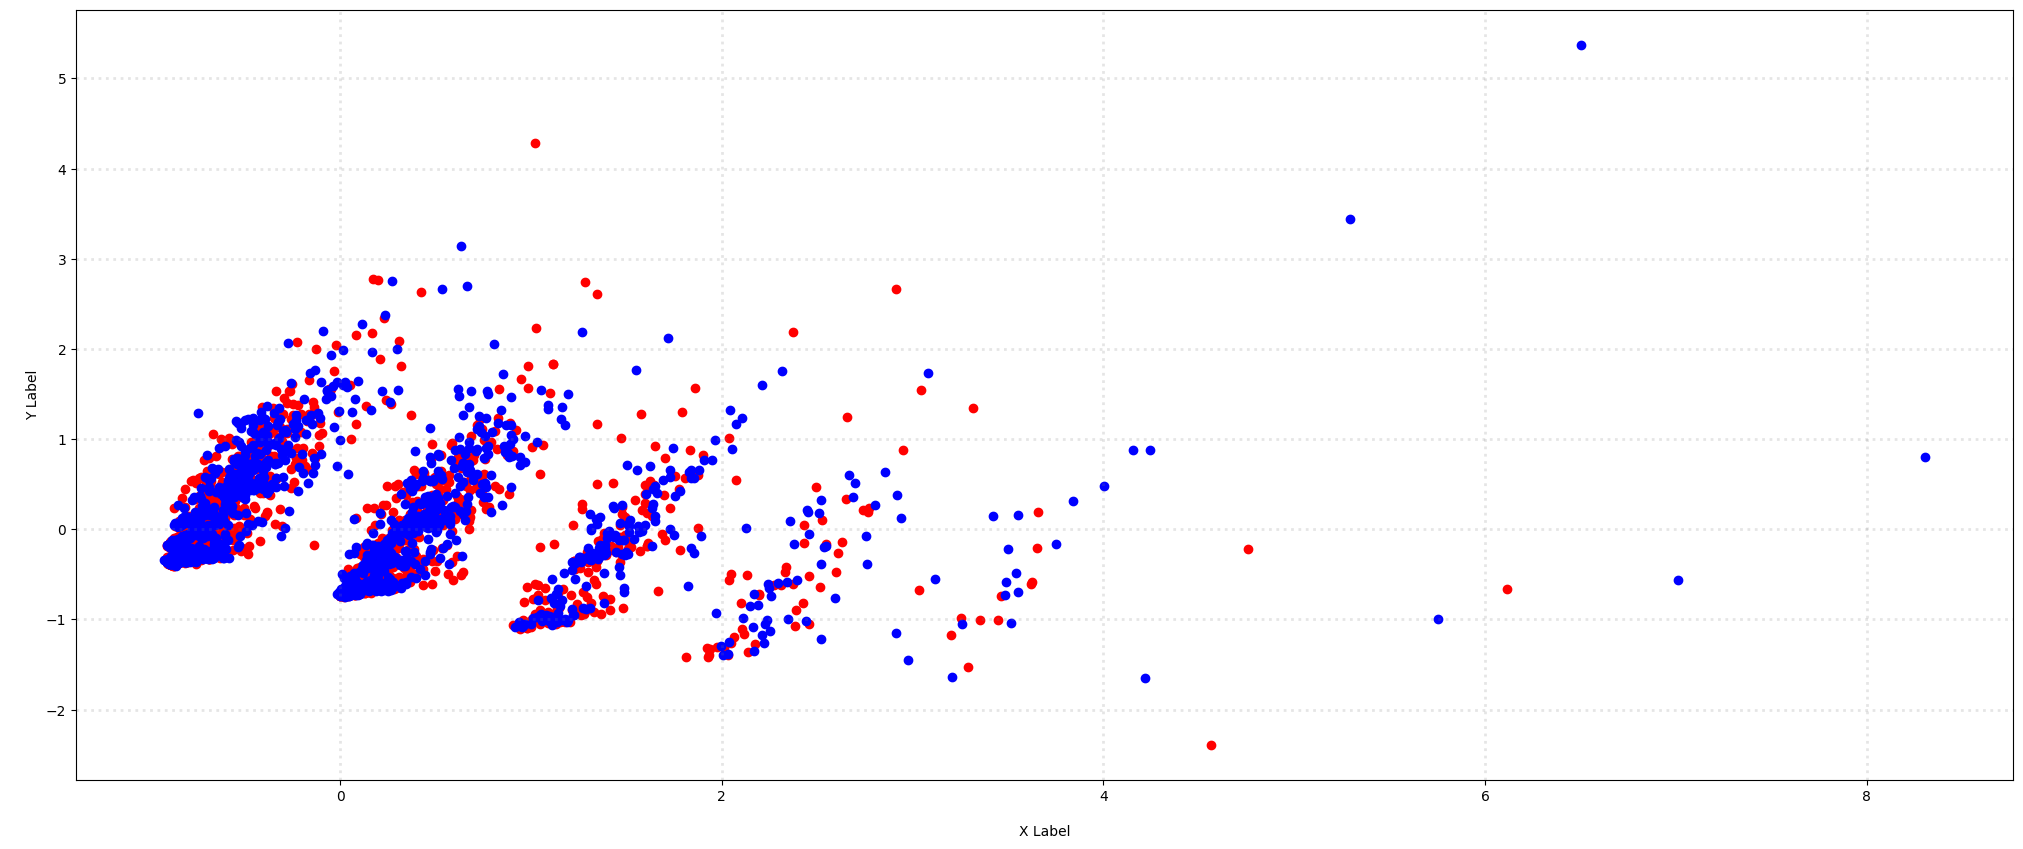

In [43]:
col = ['red','blue']
score = ['0','1']
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, score in zip(col, score):
    xs = X_reduced[X['score'] == score].T[0]
    ys = X_reduced[X['score'] == score].T[1]
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

As the result, two different graph seems to have completely same result.

Graph a 3D vision in angle 1.

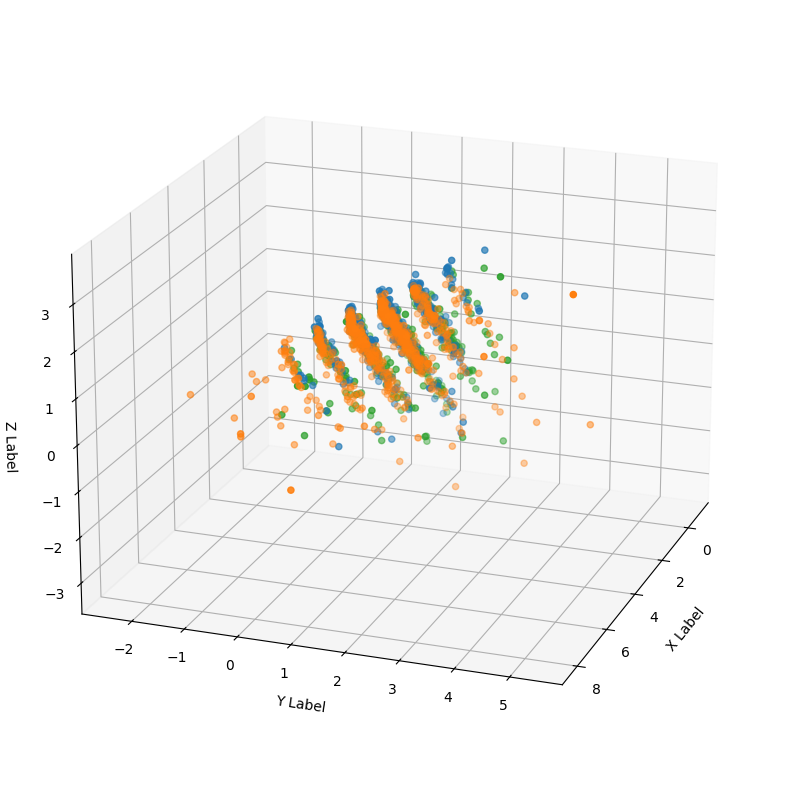

In [44]:
from sklearn.decomposition import PCA
def draw_3D(view=[20,20]):
    X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
    source = ['yelp','imdb','amazon_cells']
    col = ['coral', 'blue', 'black']
    fig = plt.figure(figsize = (25,10))
    ax = fig.add_subplot(111, projection='3d')

    for c, source in zip(col, source):
        xs = X_reduced[X['source_name'] == source].T[0]
        ys = X_reduced[X['source_name'] == source].T[1]
        zs = X_reduced[X['source_name'] == source].T[2]
        ax.scatter(xs, ys, zs, marker='o')

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')
    ax.view_init(azim=view[0], elev=view[1])
    
draw_3D()

Angle 2

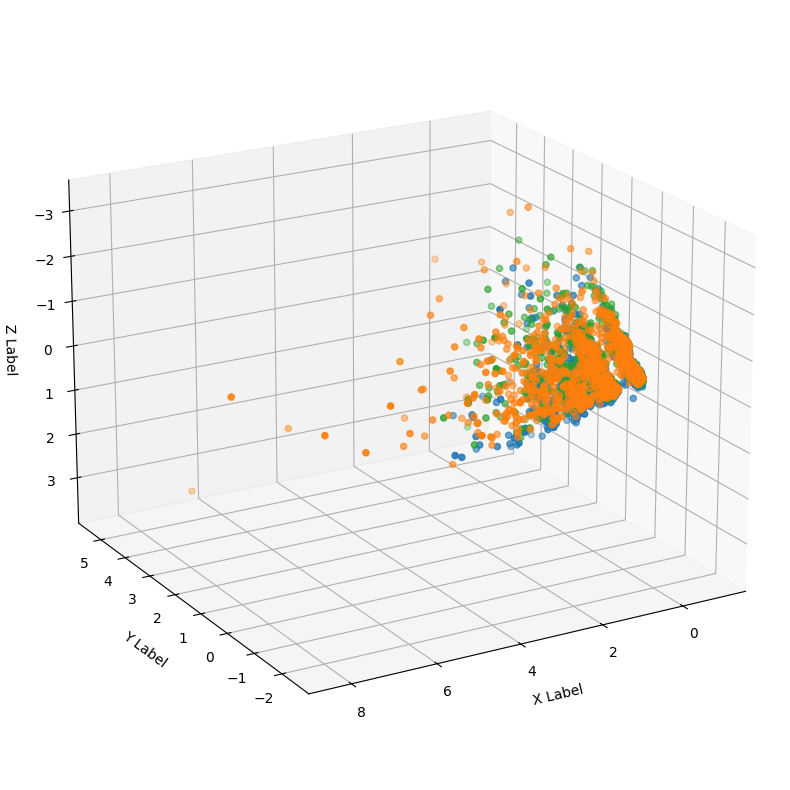

In [45]:
draw_3D([120,200])

Angle 3

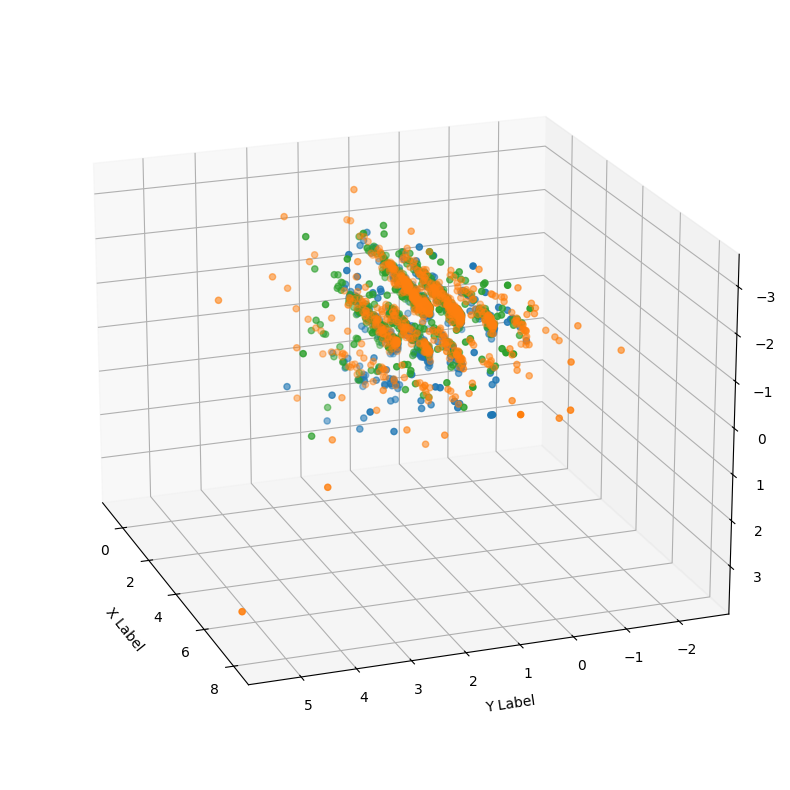

In [46]:
draw_3D([200,200])

Draw a bar chart to see the word frequency in alphabet order by plotly.

In [47]:
import plotly.express as px
sum_words = X_counts.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for idx,word in enumerate(count_vect.get_feature_names_out())]
fig = px.bar(x=[i[0] for i in words_freq][:300],y=[i[1] for i in words_freq][:300],title='Words frequency',)
fig.update_layout(title='Words frequency', xaxis_title='word', yaxis_title='frequency')
fig.show()

Draw a bar chart to see the word frequency in time order.

In [48]:
import plotly.express as px
sum_words = X_counts.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for idx,word in enumerate(count_vect.get_feature_names_out())]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

fig = px.histogram(x=[i[0] for i in words_freq][:500],y=[i[1] for i in words_freq][:500],nbins=200,opacity=0.8)
fig.update_traces(marker=dict(color='lightblue'))

fig.update_layout(title='Words frequency', xaxis_title='word', yaxis_title='frequency')
fig.show()

Use log distribution to modify data frequency in alphabet order.

C:\Users\gf812\AppData\Local\Temp\ipykernel_14440\3633849381.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


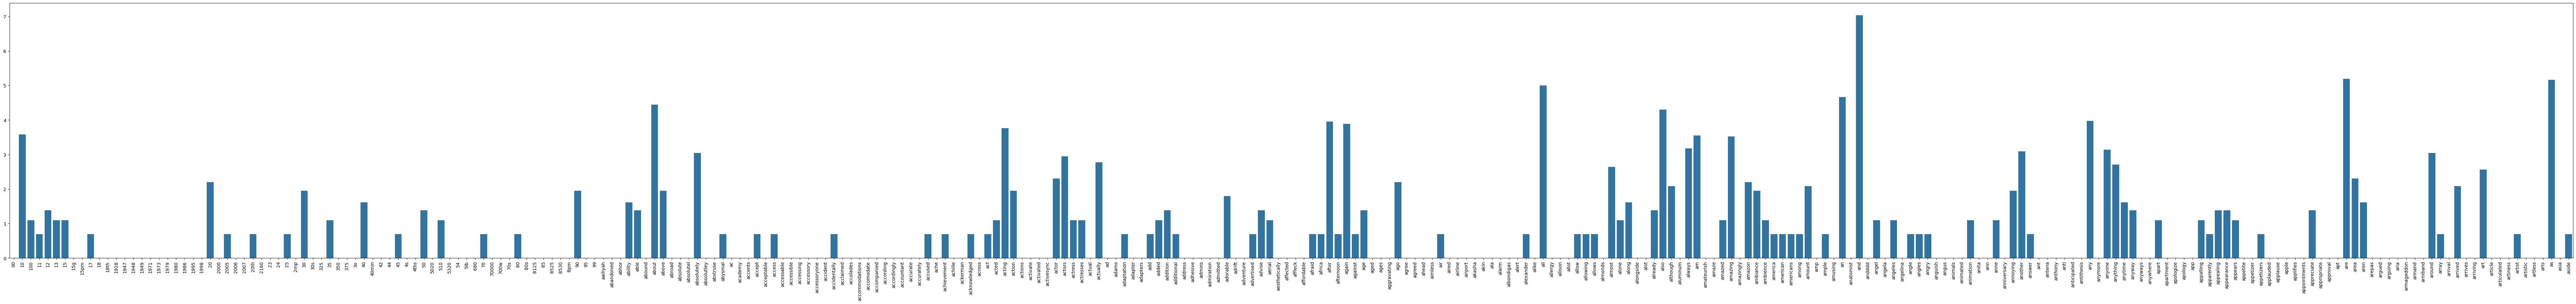

In [49]:
import math
words_freq = [(word, sum_words[0, idx]) for idx,word in enumerate(count_vect.get_feature_names_out())]
word_frequencies_log = [math.log(i[1]) for i in words_freq]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=word_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

Use log distribution to modify data frequency in frequency order.

['the', 'and', 'it', 'is', 'to', 'this', 'of', 'was', 'in', 'for', 'that', 'not', 'with', 'my', 'very', 'good', 'on', 'you', 'great', 'but', 'have', 'movie', 'are', 'as', 'so', 'phone', 'film', 'all', 'be', 'one', 'had', 'at', 'food', 'like', 'just', 'place', 'there', 'time', 'service', 'an', 'they', 'we', 'were', 'bad', 'from', 'if', 'really', 'well', 'out', 'has', 'would', 'about', 'can', 'no', 'or', 'your', 'don', 'only', 'best', 'by', 'even', 'here', 'ever', 'also', 'up', 'will', 'back', 'me', 'when', 'more', 'than', 'quality', 'go', 've', 'he', 'what', 'love', 'made', 'which', 'because', 'how', 'too', 'work', 'get', 'product', 'some', 'their', 'any', 'better', 'could', 'do', 'nice', 'after', 'excellent', 'never', 'been', 'works', 'much', 'sound', 'who', 'again', 'did', 'other', 'our', 'recommend', 'use', 'headset', 'his', 'first', 'think', 'battery', 'way', 'them', 'acting', 'pretty', 'see', 'didn', 'its', 'make', 'most', 'over', 'worst', 'got', 'now', 'still', 'everything', '10',

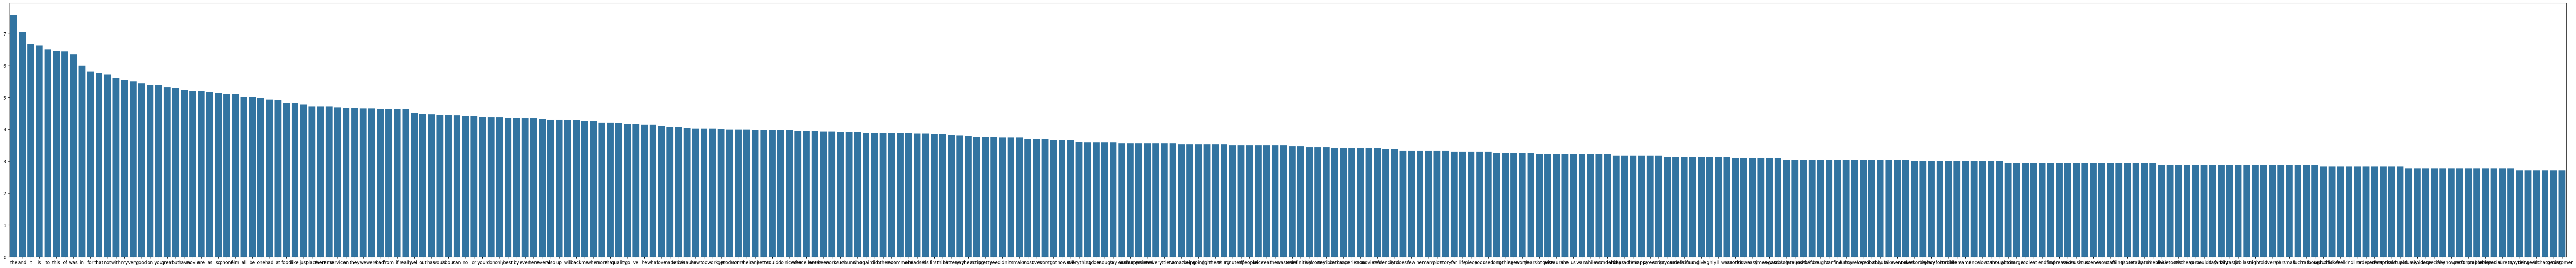

In [50]:
import math
words_freq = [(word, sum_words[0, idx]) for idx,word in enumerate(count_vect.get_feature_names_out())]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
word_frequencies_log = [math.log(i[1]) for i in words_freq]


print([i[0] for i in words_freq][:300])
plt.subplots(figsize=(100, 10))
g = sns.barplot(x= [i[0] for i in words_freq][:300],
                y=word_frequencies_log[:300])


Do discretization to data_source.

In [51]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.source)
X['bin_source'] = mlb.transform(X['source']).tolist()
X

,text,score,source,source_name,unigrams,bin_source
0,Wow... Loved this place.,1,0,yelp,"[Wow, ..., Loved, this, place, .]","[1, 0, 0]"
1,Crust is not good.,0,0,yelp,"[Crust, is, not, good, .]","[1, 0, 0]"
2,Not tasty and the texture was just nasty.,0,0,yelp,"[Not, tasty, and, the, texture, was, just, nas...","[1, 0, 0]"
3,Stopped by during the late May bank holiday of...,1,0,yelp,"[Stopped, by, during, the, late, May, bank, ho...","[1, 0, 0]"
4,The selection on the menu was great and so wer...,1,0,yelp,"[The, selection, on, the, menu, was, great, an...","[1, 0, 0]"
...,...,...,...,...,...,...
2995,The screen does get smudged easily because it ...,0,2,amazon_cells,"[The, screen, does, get, smudged, easily, beca...","[0, 0, 1]"
2996,What a piece of junk.. I lose more calls on th...,0,2,amazon_cells,"[What, a, piece, of, junk, .., I, lose, more, ...","[0, 0, 1]"
2997,Item Does Not Match Picture.,0,2,amazon_cells,"[Item, Does, Not, Match, Picture, .]","[0, 0, 1]"
2998,The only thing that disappoint me is the infra...,0,2,amazon_cells,"[The, only, thing, that, disappoint, me, is, t...","[0, 0, 1]"


Calculate the similartiy of text between data.

In [52]:
from sklearn.metrics.pairwise import cosine_similarity
import itertools as it
X_shuffled = X.sample(n=len(X), random_state= 50) # because X is orderd by source, we shuffle it in advance to reduce some risk.


# Create a function to transform the text into count_vect.
def text_to_count_vect(data,i):
    document_to_transform = [data.iloc[i]['text']]
    document_vector_count = count_vect.transform(document_to_transform)
    return document_vector_count

# Create a function to print the cosine similarity in between, the data could be the same.
def find_cos_sim_count(data,i_list):
    for combi in list(it.combinations_with_replacement(i_list,2)):
        cos_sim_count= cosine_similarity(text_to_count_vect(data,combi[0]), text_to_count_vect(data,combi[1]), dense_output=True)
        sim = cos_sim_count[0][0]
        print(f"Cosine Similarity using count bw {combi[0]} and {combi[1]}: {sim}")

# Create a function to rank the similarity in between, the data is different.
def rank_distance(data,i_list):
    rank_list = []
    for combi in list(it.combinations(i_list,2)):
        cos_sim_count= cosine_similarity(text_to_count_vect(data,combi[0]), text_to_count_vect(data,combi[1]), dense_output=True)
        sim = cos_sim_count[0][0]
        rank_list.append([combi[0],combi[1],sim])
    rank_list = sorted(rank_list, key= lambda x: x[2], reverse=True)
    for i, val in enumerate(rank_list):
        print(f"The similarity ranked {i+1} is data {val[0]} and data {val[1]}, which is {val[2]} ")
        


test_list = [50,250,203,100,1503] # select the test case radomly
find_cos_sim_count(X_shuffled,test_list)
rank_distance(X_shuffled,test_list)

Cosine Similarity using count bw 50 and 50: 1.0000000000000002
Cosine Similarity using count bw 50 and 250: 0.10814761408717502
Cosine Similarity using count bw 50 and 203: 0.0
Cosine Similarity using count bw 50 and 100: 0.0
Cosine Similarity using count bw 50 and 1503: 0.0890870806374748
Cosine Similarity using count bw 250 and 250: 0.9999999999999993
Cosine Similarity using count bw 250 and 203: 0.10495671428119792
Cosine Similarity using count bw 250 and 100: 0.0
Cosine Similarity using count bw 250 and 1503: 0.17342199390482396
Cosine Similarity using count bw 203 and 203: 1.0000000000000002
Cosine Similarity using count bw 203 and 100: 0.0
Cosine Similarity using count bw 203 and 1503: 0.17291712531127046
Cosine Similarity using count bw 100 and 100: 0.9999999999999998
Cosine Similarity using count bw 100 and 1503: 0.0
Cosine Similarity using count bw 1503 and 1503: 0.9999999999999997
The similarity ranked 1 is data 250 and data 1503, which is 0.17342199390482396 
The similarity 

## Part 3

First, we want to show the words and their frequencies in a more directly way, because the more the words we have, the more difficult more user to understand their distribute from bar chart.

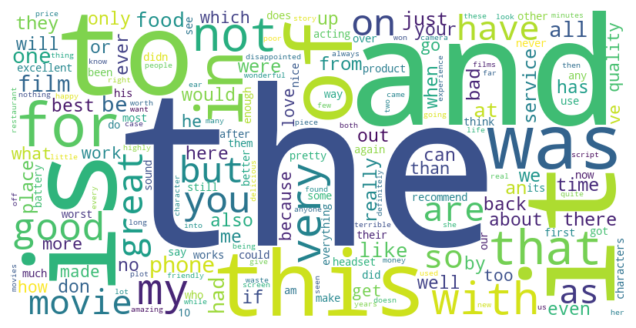

In [53]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
words_freq_dict = {x[0]:x[1] for x in words_freq}
# transform words_freq into dict type for wordcloud usage.

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_freq_dict)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

Then, we want to figure out that whether the length of comment has some relation to the score.
Although the result might be ambiguous from our intuitions, we still want to know does the length of comment provide evidence or not!  

Therefore, we choose logisticRegression as the model to do this experiement.

In [54]:
# Analysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

analyze = count_vect.build_analyzer()
text_length = []

for val in X.text:
    text_length.append(len(analyze(val)))
# establish the text_length_list

text_length = np.array(text_length).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(text_length, list(X.score), test_size=0.2, random_state=42)

LR_model = LogisticRegression()
LR_model.fit(X_test, y_test)
y_pred = LR_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


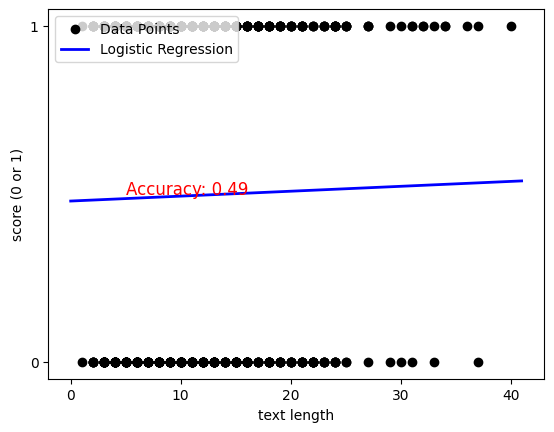

In [55]:
# Draw the plot
x_min, x_max = X_test.min() - 1, X_test.max() + 1
xx = np.linspace(x_min, x_max, 1000).reshape(-1, 1)
yy = LR_model.predict_proba(xx)[:, 1]

plt.scatter(X_test, y_test, color='black', marker='o', label='Data Points')
plt.plot(xx, yy, color='blue', linewidth=2, label='Logistic Regression')
plt.xlabel('text length')
plt.ylabel('score (0 or 1)')
plt.legend(loc='upper left')
plt.text(5, 0.5, f'Accuracy: {accuracy:.2f}', fontsize=12, color='red')
plt.show()

As the result, we could see that in this case, the relation between text length and score is not signicicant and even be useless to our analysis.  
Although the result is not that ideal, it's still a fun experiement!

Generate TF-IDF features from the tokens of each text.

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
X_counts_tfidf = tfidf_vect.fit_transform(X.text)
print(X_counts_tfidf.shape)
print(X_counts_tfidf[0])

(2983, 17312)
  (0, 9097)	0.515863127906902
  (0, 17172)	0.5423315800027808
  (0, 11234)	0.28073593508909933
  (0, 9087)	0.3857988108697423
  (0, 17169)	0.46055217172317886


In [57]:
tfidf_vect.get_feature_names_out()[200]

'absolutely'

Implement a simple Naive Bayes classifier by word frequency and draw the ROC curves.


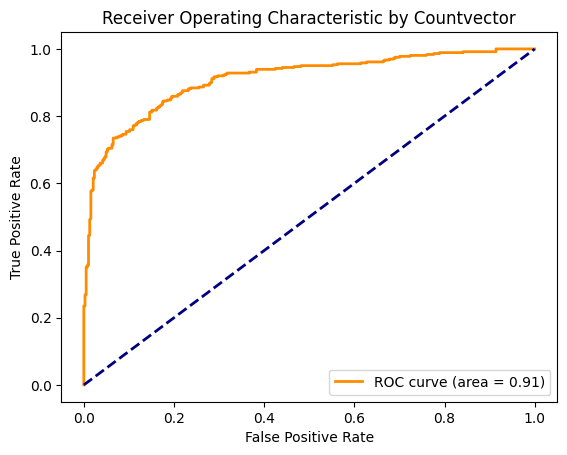

In [58]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
X['score_modified'] = X.score.apply(lambda x: 1 if x == '1' else -1)
# modified 0,1 to -1,1, making sure naive bayes works.

X_train, X_test, Y_train, Y_test = train_test_split(X.text, X.score_modified, test_size=0.25)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)

mnb_count_vect = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
mnb_count_vect.fit(X_train_counts, Y_train)
y_pred_prob_count_vect = mnb_count_vect.predict_proba(X_test_counts)[:, 1]

fpr_count_vect, tpr_count_vect, _ = roc_curve(Y_test, y_pred_prob_count_vect,pos_label=1)
roc_auc_count_vect = auc(fpr_count_vect, tpr_count_vect)
plt.figure()
plt.plot(fpr_count_vect, tpr_count_vect, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_count_vect:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic by Countvector')
plt.legend(loc='lower right')
plt.show()

Implement a simple Naive Bayes classifier by TFIDF and draw the ROC curves.

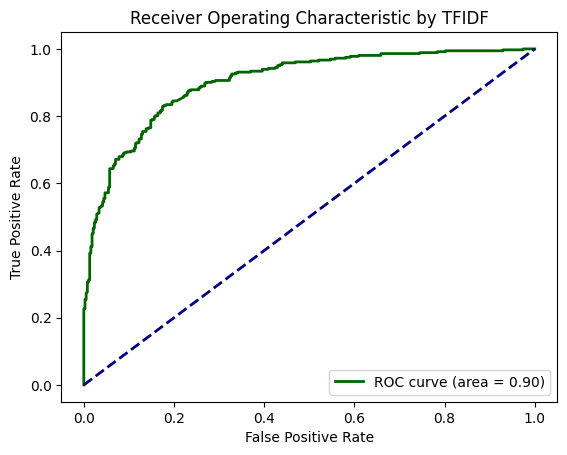

In [59]:
tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

mnb_tfidf = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
mnb_tfidf.fit(X_train_tfidf, Y_train)
y_pred_prob_tfidf = mnb_tfidf.predict_proba(X_test_tfidf)[:, 1]

fpr_tfidf, tpr_tfidf, _ = roc_curve(Y_test, y_pred_prob_tfidf,pos_label=1)
roc_auc_tfidf = auc(fpr_tfidf, tpr_tfidf)


plt.figure()
plt.plot(fpr_tfidf, tpr_tfidf, color='darkgreen', lw=2, label=f'ROC curve (area = {roc_auc_tfidf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic by TFIDF')
plt.legend(loc='lower right')
plt.show()

Draw together and compared to each.

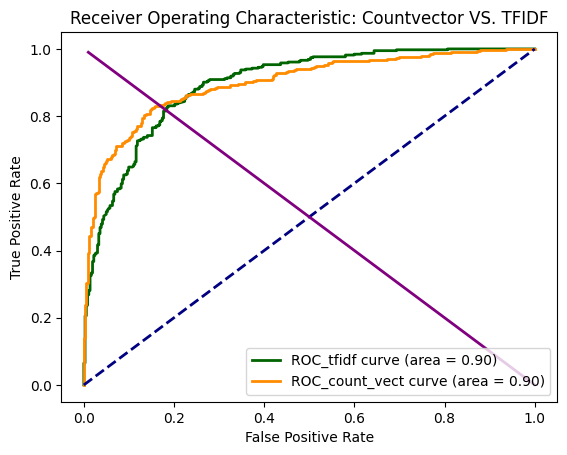

In [60]:
import numpy as np
# Split the train data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X.text, X.score_modified, test_size=0.25)


# Implement naive bayes by countvector
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)

mnb_count_vect = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
mnb_count_vect.fit(X_train_counts, Y_train)
y_pred_prob_count_vect = mnb_count_vect.predict_proba(X_test_counts)[:, 1]

fpr_count_vect, tpr_count_vect, _ = roc_curve(Y_test, y_pred_prob_count_vect,pos_label=1)
roc_auc_count_vect = auc(fpr_count_vect, tpr_count_vect)


# Implement naive bayes by TFIDF
tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

mnb_tfidf = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
mnb_tfidf.fit(X_train_tfidf, Y_train)
y_pred_prob_tfidf = mnb_tfidf.predict_proba(X_test_tfidf)[:, 1]

fpr_tfidf, tpr_tfidf, _ = roc_curve(Y_test, y_pred_prob_tfidf,pos_label=1)
roc_auc_tfidf = auc(fpr_tfidf, tpr_tfidf)

# Draw the plot
plt.figure()
plt.plot(fpr_tfidf, tpr_tfidf, color='darkgreen', lw=2, label=f'ROC_tfidf curve (area = {roc_auc_tfidf:.2f})')
plt.plot(fpr_count_vect, tpr_count_vect, color='darkorange', lw=2, label=f'ROC_count_vect curve (area = {roc_auc_count_vect:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle="--")
x = np.linspace(0.01, 1, 100)
y = 1-x
plt.plot(x, y, color='purple', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic: Countvector VS. TFIDF')
plt.legend(loc='lower right')
plt.show()

After serveral times of testings and observations, we could see that the area of two features are quite similar. However, their ROC curves' shape are different. In general, The countvector ROC curve have bigger area than TFIDF ROC curve before x+y = 1(the purple line), and have smaller area after it.

## Part 4

1. In 4.2 dealing with duplicate data, we use X.drop_duplicates(keep=False, inplace=True) to drop the duplicate data, however in genereal cases, we should keep each one of the duplicate data instead of deleting all. The biggest problem is that whether we should delete one of them. For instance, if we are dealing with a transaction data, how do we know the 2 identical data is different or duplicated? If we want to keep only one of them, we should keep the first or the last one?

2. In 5.2 features creation, we use Seaborn-Heatmap to illustrate the numerical relations between texts and the words. However in the lab, we found that it's not very a good idea to visualize the text and the word by index. What I do is to show the most-used word and the text, so we can a least found something instead of nearly nothing on the graph. Moreover, we can delete some neutral most-used word such as: the, that and so on, and then put on all category text in equal number. Therefore, we could see what word has stronger relation to what text.

3. In 5.4 Dimensionality Reduction, our take home Exercise 12 is to graph scatters in 3 different angle. I define a function to do the graph, and the paramerter be the angles in Part two for general usage.

4. In 5.5 Attribute Transformation / Aggregation, we sum up the word frequency. However, we found that the functions are too time-consuming, so I search the methods online, and came out with a more efficient way to sum up the frequency, cutting down time from over 1 minute to less than 1 seconds. However, I am not sure that whether this works in general cases.

5. In 6. Data Exploration, We have binarized the document_vetor_count, but when we compute the cosine simarlarity, we use document_vector_count instead of document_vetor_count_bin. I have tried two different type of object to experiement, and I found that the result is different, so I wonder that why we don't use the binarized one. Moreover, I define the function to compute the progress and count their cosine similarity by combinations method, more details are at the part3.

